<a href="https://colab.research.google.com/github/JHON-EDV/Regresion-Polinomica/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


%matplotlib inline

# Se cargan los datos
spo = pd.read_csv('https://raw.githubusercontent.com/JHON-EDV/Regresion-Polinomica/master/datos_regresion.csv',names=["x1","y1","y1r"])
# se imprimen los primeros 5 datos.
spo.head()

,x1,y1,y1r
0,0.612566,-3.718010,-3.818035
1,0.989950,-0.954053,-0.961823
2,0.527680,-3.082132,-3.214144
3,0.479523,-2.757592,-2.779677
4,0.801348,-4.547470,-4.327820


In [38]:
type(spo['x1']) 
spo['x1'].values.reshape(-1,1)  # algunas validaciones.

array([[0.61256647],
       [0.98995021],
       [0.52768007],
       [0.47952339],
       [0.80134761],
       [0.22784294],
       [0.49809429],
       [0.90085249],
       [0.57466122],
       [0.84517819],
       [0.73864029],
       [0.58598704],
       [0.24673453],
       [0.66641622],
       [0.08348281],
       [0.62595979],
       [0.66094456],
       [0.72975186],
       [0.89075212],
       [0.98230322]])

In [131]:
# Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.linear_model import LinearRegression 
# para generar características polinómicas
from sklearn.preprocessing import PolynomialFeatures 
pf = PolynomialFeatures(degree = 3)    # usaremos polinomios de grado 3
X  = pf.fit_transform(spo['x1'].values.reshape(-1,1))
regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression
# instruimos a la regresión lineal que aprenda de los datos (ahora polinómicos) (X,y)
regresion_lineal.fit(X, spo['y1']) 
# vemos los parámetros que ha estimado la regresión lineal
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))
print('La funcion obteninda es: {:.2f} x^3 + {:.2f} x^2+ {:.2f} x+ {:.2f} '.format(regresion_lineal.coef_[3],regresion_lineal.coef_[2],regresion_lineal.coef_[1],regresion_lineal.intercept_))

w = [  0.          22.85694656 -66.1703959   45.81853165], b = -3.632492790991109
La funcion obteninda es: 45.82 x^3 + -66.17 x^2+ 22.86 x+ -3.63 


In [132]:
import scipy.integrate as integrate
from sklearn.metrics import mean_squared_error # importamos el cálculo del error cuadrático medio (MSE)
# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X)
# Calculamos el Error de Entrenamiento o de Estimacion 
error_entrenamiento = np.sum(np.subtract(spo['y1'], prediccion_entrenamiento))
print("El error de entrenamiento es {:.28f}".format(error_entrenamiento))
y = spo['y1']
x = np.power(2,np.subtract(spo['y1'], prediccion_entrenamiento))
print("El error entre funciones es {:.3f}".format(integrate.simps(x)))

El error de entrenamiento es 0.0000000000000417443857259059
El error entre funciones es 19.233


5.491336782692883

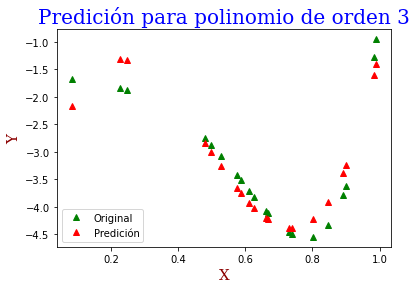

In [133]:
plt.plot(spo['x1'],spo['y1'],'g^')
plt.plot(spo['x1'],prediccion_entrenamiento,'r^')

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title("Predición para polinomio de orden 3", fontdict = font1)
plt.xlabel('X', fontdict = font2)
plt.ylabel('Y', fontdict = font2)
plt.legend(['Original','Predición'])


In [ ]:
from sklearn.metrics import mean_squared_error # importamos el cálculo del error cuadrático medio (MSE)
# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X)
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = y, y_pred = prediccion_entrenamiento)
# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
# calculamos el coeficiente de determinación R2
r2 = regresion_lineal.score(X, y)
print('Coeficiente de Determinación R2 = ' + str(r2))